In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import joblib

# Detect Ransomware, Phishing, and Trojan.

In [40]:
df1 = pd.read_csv('ransomware.csv')

# delete the useless columns :
df1 = df1.drop(columns=['FileName','md5Hash'])

# replace the value repeated : MD5HASH - DebugSize - MajorOSVersion - BitcoinAddresses - NumberOfSections - SizeOfStackReserve
columns = ["Machine", "DebugSize", "NumberOfSections", "SizeOfStackReserve","MajorOSVersion", "BitcoinAddresses"]
for col in columns:
    df1[col] = df1[col].astype('category')
    df1[col] = df1[col].cat.codes

# delete all the duplicated rows :
df1 = df1.drop_duplicates(keep='last')

# save the new datasets into new csv file :
df1.to_csv("df_clear.csv")

In [41]:
df1 = pd.read_csv("df_clear.csv")
df1

,Unnamed: 0,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,1,4,11,121728,10,10,126576,4930,0,14,10,7,9,16864,1024,0,1
1,3,4,11,19904,10,10,21312,252,18160,14,10,5,9,16736,1040,0,1
2,4,4,11,97728,10,10,105792,1852,70592,14,10,6,9,16736,1096,0,1
3,5,4,11,319776,10,10,374944,9208,312608,14,10,6,9,16736,2072,0,1
4,7,4,11,197888,10,10,229024,112,187208,14,10,6,9,16736,1328,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32251,62480,1,0,0,1,4,0,0,4096,6,0,2,12,0,23504,0,0
32252,62481,1,0,0,7,10,0,0,0,7,0,6,12,0,15704,0,0
32253,62482,1,0,0,0,4,0,0,404908,2,50,10,12,0,2364,0,0
32254,62483,1,0,0,0,4,14448,70,4096,8,0,3,12,0,130296,0,0


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          32256 non-null  int64
 1   Machine             32256 non-null  int64
 2   DebugSize           32256 non-null  int64
 3   DebugRVA            32256 non-null  int64
 4   MajorImageVersion   32256 non-null  int64
 5   MajorOSVersion      32256 non-null  int64
 6   ExportRVA           32256 non-null  int64
 7   ExportSize          32256 non-null  int64
 8   IatVRA              32256 non-null  int64
 9   MajorLinkerVersion  32256 non-null  int64
 10  MinorLinkerVersion  32256 non-null  int64
 11  NumberOfSections    32256 non-null  int64
 12  SizeOfStackReserve  32256 non-null  int64
 13  DllCharacteristics  32256 non-null  int64
 14  ResourceSize        32256 non-null  int64
 15  BitcoinAddresses    32256 non-null  int64
 16  Benign              32256 non-null  int6

In [74]:
# Transoform into List :
x1 = df1.iloc[:, 1:-1].values
y1 = df1.iloc[:,-1].values

print("The features (Machine ... Bitcoin@) : ")
y1

# 0 - Non-Benign    1 - Benign

The features (Machine ... Bitcoin@) : 


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [112]:
# Generate random classification data
x1, y1 = make_classification(n_samples=1000, n_features=15, n_classes=2,random_state=0)

# Split data into training and testing sets
# 20% testing and 80% train
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100,random_state=0)

# Fit the Random Forest Classifier to the training data
rf.fit(x1_train, y1_train)

# Predict the classes of the testing set
y1_pred = rf.predict(x1_test)

# Print the accuracy of the model
print(f"Accuracy: {rf.score(x1_test, y1_test) * 100:.2f}%")

Accuracy: 97.00%


In [29]:
# Calculate cross-validation scores for the model
# cross-validation scores for a model : a way of evaluating the performance of the model on a given dataset.
scores = cross_val_score(rf, x1, y1, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Mean score refers to the average score obtained from a set of scores.
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.99  0.96  0.935 0.95  0.96 ]
Mean Score: 0.959


In [30]:
# Load new data for prediction
x1_new = [[1, 1, 0, 0, 6, 2, 0, 8192, 8, 0, 3, 1048576, 34112, 672,0],[3, 0, 0, 0, 6, 2, 0, 8192, 8,	0, 0, 0, 0, 672,0 ]]

# Use the model to predict the classes of the new data
y_pred = rf.predict(x1_new)

# Print the predicted classes of the new data
print("Predicted classes:", y_pred)

Predicted classes: [1 1]


Confusion Matrix:
[[95  3]
 [ 3 99]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        98
           1       0.97      0.97      0.97       102

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



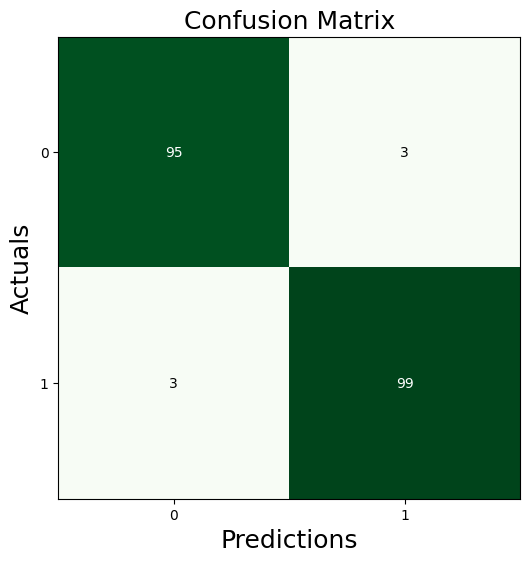

In [89]:
# Use the model to predict the classes of the testing set
y_pred = rf.predict(x1_test)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
cm=confusion_matrix(y1_test, y_pred)
print(cm)

print("\n Classification Report:")
print(classification_report(y1_test, y_pred))

fig, ax = plot_confusion_matrix(conf_mat=cm , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [25]:
# Load the dataset
df2 = pd.read_csv("phishing_set.csv")
df2

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11612
           1       0.95      0.96      0.96      6118

    accuracy                           0.97     17730
   macro avg       0.97      0.97      0.97     17730
weighted avg       0.97      0.97      0.97     17730



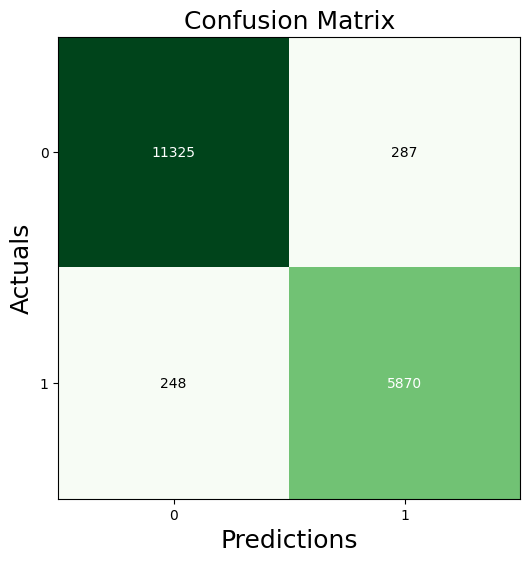

In [131]:
# Assuming your dataset contains features and a target variable
x2 = df2.drop(['phishing'], axis=1)  # Features
y2 = df2['phishing']  # Target variable

# Split the dataset into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(x2_train, y2_train)

# Make predictions
y2_pred = model.predict(x2_test)

# Print classification report
print(classification_report(y2_test, y2_pred))

cm2=confusion_matrix(y2_test, y2_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm2 , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Number of legitimate website instances (labeled as 0): 58,000
# Number of phishing website instances (labeled as 1): 30,647

In [123]:
# Load the dataset
df3 = pd.read_csv("Trojan_Detection.csv")

# Remove leading underscores and replace special characters with underscores in column names
df3.columns = df3.columns.str.lstrip('_').str.replace('[^a-zA-Z0-9]', '_', regex=True)

In [124]:
# Check the column names to verify spelling and case
print(df3.columns)

Index(['Unnamed__0', 'Flow_ID', '_Source_IP', '_Source_Port',
       '_Destination_IP', '_Destination_Port', '_Protocol', '_Timestamp',
       '_Flow_Duration', '_Total_Fwd_Packets', '_Total_Backward_Packets',
       'Total_Length_of_Fwd_Packets', '_Total_Length_of_Bwd_Packets',
       '_Fwd_Packet_Length_Max', '_Fwd_Packet_Length_Min',
       '_Fwd_Packet_Length_Mean', '_Fwd_Packet_Length_Std',
       'Bwd_Packet_Length_Max', '_Bwd_Packet_Length_Min',
       '_Bwd_Packet_Length_Mean', '_Bwd_Packet_Length_Std', 'Flow_Bytes_s',
       '_Flow_Packets_s', '_Flow_IAT_Mean', '_Flow_IAT_Std', '_Flow_IAT_Max',
       '_Flow_IAT_Min', 'Fwd_IAT_Total', '_Fwd_IAT_Mean', '_Fwd_IAT_Std',
       '_Fwd_IAT_Max', '_Fwd_IAT_Min', 'Bwd_IAT_Total', '_Bwd_IAT_Mean',
       '_Bwd_IAT_Std', '_Bwd_IAT_Max', '_Bwd_IAT_Min', 'Fwd_PSH_Flags',
       '_Bwd_PSH_Flags', '_Fwd_URG_Flags', '_Bwd_URG_Flags',
       '_Fwd_Header_Length', '_Bwd_Header_Length', 'Fwd_Packets_s',
       '_Bwd_Packets_s', '_Min_Packet_Len

In [129]:
# Remove columns with special characters from feature names
columns_to_drop = ['Class', 'Flow_ID', '_Source_IP', '_Destination_IP', '_Timestamp']
x3 = df3.drop(columns=columns_to_drop)
y3 = df3['Class']

# Split the dataset into training and testing sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Define the LightGBM classifier
clf = lgb.LGBMClassifier()

# Train the classifier on the training data
clf.fit(x3_train, y3_train)

[LightGBM] [Info] Number of positive: 72623, number of negative: 69362
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14828
[LightGBM] [Info] Number of data points in the train set: 141985, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511484 -> initscore=0.045943
[LightGBM] [Info] Start training from score 0.045943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMClassifier()

Accuracy: 0.9999154858157028
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     17437
      Trojan       1.00      1.00      1.00     18060

    accuracy                           1.00     35497
   macro avg       1.00      1.00      1.00     35497
weighted avg       1.00      1.00      1.00     35497



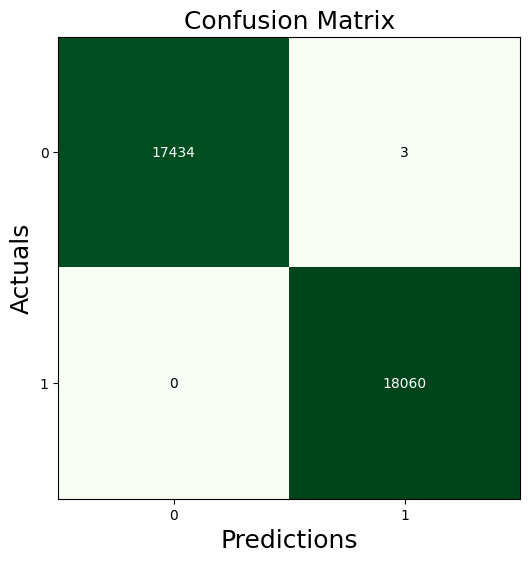

In [130]:

# Evaluate the model's performance on the testing data
accuracy = clf.score(x3_test, y3_test)
print("Accuracy:", accuracy)

# Generate classification report
y3_pred = clf.predict(x3_test)
print("Classification Report:")
print(classification_report(y3_test, y3_pred))

cm3=confusion_matrix(y3_test, y3_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm3 , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()